In [1]:
import glob
import os
import sys
import time as time_module


import numpy as np
import pandas as pd
from mvgavg import mvgavg
import skimage
import importlib
import matplotlib.pyplot as plt
%matplotlib widget

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools

PAMFluo_path = "C:/Users/Lab/Desktop/DREAM_repo/Codes_Alienor/PAMFluo-dynamic_python"
if PAMFluo_path not in sys.path:
    sys.path.append(PAMFluo_path)

import VoltageIntensityClass


In [2]:
######## Set the path to experimental and processed data ########

path = "E:/Experimental_data/DREAM_microscope/"
exp = "2023-10-24_16_36_Activation_curve/"
folder = path + exp
data_processing_folder = folder + "data_processing/"
if not os.path.exists(data_processing_folder):
    os.mkdir(data_processing_folder)


In [3]:
######## Load photodiode outputs ########

list_photodiode_output = glob.glob(folder + "*output*")

outputs_photodiode = []
for i in list_photodiode_output:
    outputs_photodiode.append(pd.read_csv(i))

In [4]:
# Subtract baseline from photodiode outputs

for i, output in enumerate(outputs_photodiode):
    output["Fluo"] = output["Fluo"] - np.mean(output["Fluo"][0:tools.closest_index(output["time"], 4.9)])

C:\Users\Lab\AppData\Local\Temp\ipykernel_16604\214411500.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


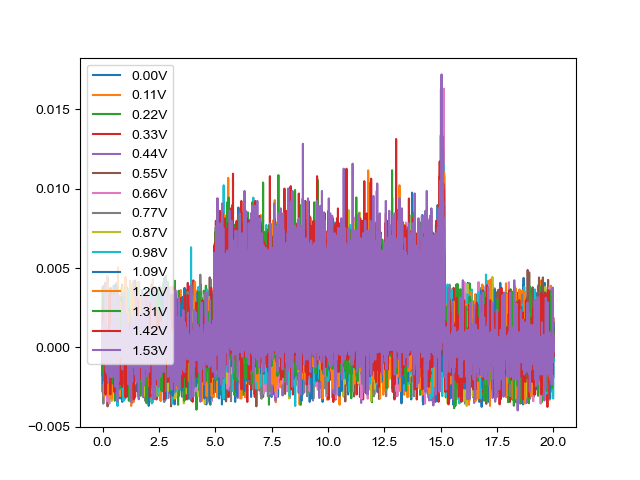

In [35]:
# Plot photodiode outputs

# "time" : time in seconds
# "Intensity" : measured intensity in V
# "Fluo" : intensity measured by the MPPC/only noise if mirror is closed
# "Blue" : set intensity for blue LED in V
# "Purple" : set intensity for purple LED in V
# "Green" : set intensity for green LED in V
# "Trigger" : trigger signal for the camera
# "jspq" : unknown

avg = 1
fig, ax = plt.subplots()
for i, output in enumerate(outputs_photodiode):
    x = mvgavg(output["time"], avg)
    y = mvgavg(output["Fluo"], avg)
    #y2 = mvgavg(output["Blue"], avg)
    ax.plot(x, y, '-', label= list_photodiode_output[i].split("\\")[-1].split("_")[-1].split(".csv")[0], color = f"C{i}")
    #ax.plot(x, y2, color = f"C{i}")

ax.legend()


In [21]:
len(output["time"])

20000

In [22]:
######## Get the measured intensities ########

Actinic_measured_volt = []
Sat_measured_volt = []

for i in range(len(outputs_photodiode)):
    Actinic_measured_volt.append(np.mean(outputs_photodiode[i][tools.closest_index(outputs_photodiode[i]["time"], 5.1):tools.closest_index(outputs_photodiode[i]["time"], 14)]["Intensity"])*100)
    Sat_measured_volt.append(np.mean(outputs_photodiode[i][tools.closest_index(outputs_photodiode[i]["time"], 14.975):tools.closest_index(outputs_photodiode[i]["time"], 15.147)]["Intensity"])*100)
    
Sat_set_volt = 3.4
Actinic_set_volt = np.linspace(0, 0.45*Sat_set_volt, 15)


In [8]:
data_dict = {}
data_dict["time"] = outputs_photodiode[0]["time"]
for i in range(len(outputs_photodiode)):
    data_dict[f"{Actinic_set_volt[i]:.2f}V"] = outputs_photodiode[i]["Fluo"]

data_df = pd.DataFrame(data_dict)
data_df

,time,0.00V,0.11V,0.22V,0.33V,0.44V,0.55V,0.66V,0.77V,0.87V,0.98V,1.09V,1.20V,1.31V,1.42V,1.53V
0,0.000,1.575857e-04,0.000137,0.000446,-0.000158,0.000090,0.000502,0.000361,0.000515,0.000686,0.000213,0.000688,0.000059,0.000854,0.000161,0.000011
1,0.001,1.575857e-04,-0.000020,-0.000335,0.000155,0.000247,0.000502,0.000205,-0.000110,-0.000252,0.000057,0.000219,0.000215,-0.000396,-0.000152,0.000168
2,0.002,-3.114143e-04,0.000605,-0.000023,-0.000002,-0.000222,-0.000436,-0.000108,-0.000110,0.000217,0.000369,-0.000094,-0.000410,0.000385,0.000317,0.000480
3,0.003,5.857143e-07,0.000137,0.000290,-0.000158,0.000559,0.000189,0.000049,-0.000266,-0.000096,0.000682,-0.000250,-0.000098,-0.000240,0.000473,-0.000614
4,0.004,9.385857e-04,0.000137,-0.000335,-0.000158,-0.000066,0.000189,-0.000264,0.000203,-0.000096,-0.000256,0.000375,-0.000098,0.000229,-0.000308,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19.995,1.575857e-04,-0.000020,-0.000179,0.000155,0.000559,0.000658,0.000205,-0.000422,0.000373,0.000682,-0.000406,0.000215,0.000229,-0.000152,0.000793
19996,19.996,6.255857e-04,-0.000020,-0.000335,-0.000158,0.000090,0.000971,-0.000108,0.000515,-0.000252,-0.000100,0.000688,-0.000098,-0.000240,0.000317,0.000480
19997,19.997,4.695857e-04,-0.000020,-0.000179,-0.000002,-0.000378,0.001283,-0.000108,-0.000110,0.000217,-0.000881,-0.000094,0.000215,0.000229,-0.000308,-0.000301
19998,19.998,-3.114143e-04,0.000137,-0.000023,-0.000314,-0.000222,0.000814,0.000205,-0.000266,-0.000096,-0.000256,-0.000094,-0.000098,-0.000396,-0.000308,-0.000301


In [9]:
importlib.reload(VoltageIntensityClass)

a480 = 82
a532=7.7

V = VoltageIntensityClass.VoltageIntensity(folder = "E:/Experimental_data/DREAM_microscope/2023-10-18_16_53_bode_diagram")
I = V.get_intensity_voltage("blue", 1, np.array(Actinic_measured_volt))*1e6*a480/a532
I_sat = V.get_intensity_voltage("blue", 1, np.array(Sat_measured_volt))*1e6*a480/a532

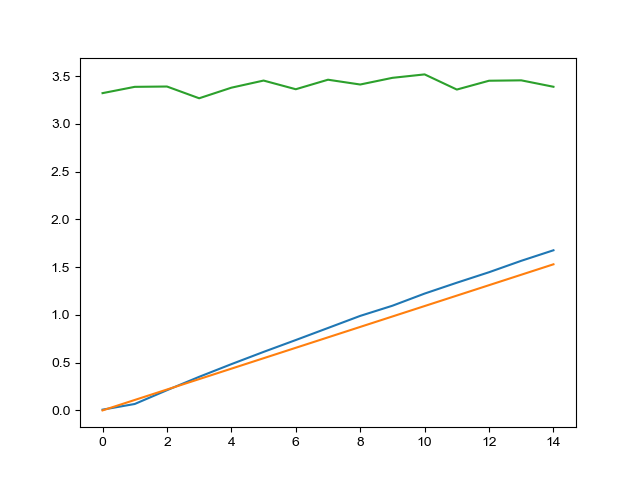

In [28]:
fig, ax = plt.subplots()
ax.plot(Actinic_measured_volt)
ax.plot(Actinic_set_volt)
ax.plot(Sat_measured_volt)

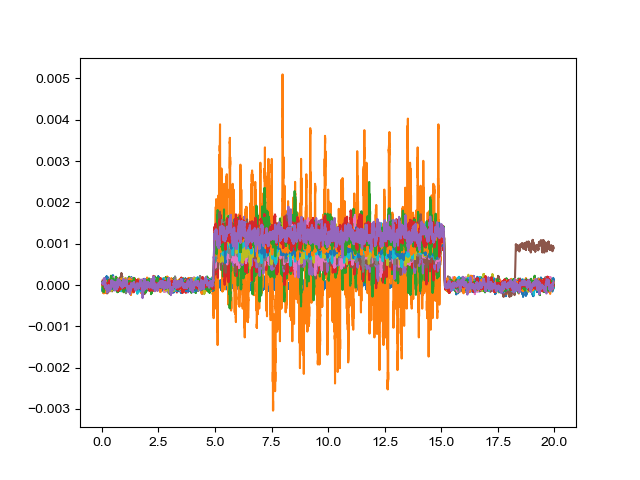

In [41]:
fig, ax =  plt.subplots()
avg = 50
x = data_df.time
data_PAM_like = {}
data_PAM_like["time"] = x
I_stat_index = [tools.closest_index(x, 4.95), tools.closest_index(x, 14.95)+1]
I_sat_index = [tools.closest_index(x,  14.95)+1, tools.closest_index(x, 15.15)]
for i, k in enumerate(data_df.columns[1:]):
    y = data_df[k].copy()
    y[I_sat_index[0]:I_sat_index[1]] = y[I_sat_index[0]:I_sat_index[1]]/Sat_measured_volt[i]
    if i > 0:
        y[I_stat_index[0]:I_stat_index[1]] = y[I_stat_index[0]:I_stat_index[1]]/Actinic_measured_volt[i]
    ax.plot(mvgavg(x,avg),mvgavg(y, avg))




Text(0, 0.5, 'Actinic voltage measured (V)')

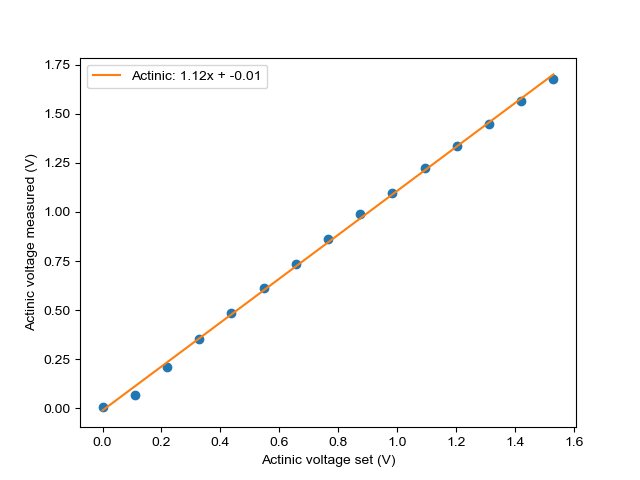

In [42]:
fig, ax = plt.subplots()
popt, xfit, yfit = tools.lin_fit(Actinic_set_volt, Actinic_measured_volt, Actinic_set_volt[0], Actinic_set_volt[-1], 100)
ax.plot(Actinic_set_volt, Actinic_measured_volt, 'o')
ax.plot(xfit, yfit, label = f"Actinic: {popt[0]:.2f}x + {popt[1]:.2f}")
ax.legend()
ax.set_xlabel("Actinic voltage set (V)")
ax.set_ylabel("Actinic voltage measured (V)")

In [37]:
def compute_params(Data_df):

    F_max = []
    F_stat = []
    phi_stat = []
    NPQ = []
    ETR = []

    for i, k in enumerate(Data_df.columns[1:]):
        F_max.append(np.mean(Data_df[k][tools.closest_index(Data_df.time,14.95)+1:tools.closest_index(Data_df.time, 15.15)]))
        NPQ.append((F_max[0] - F_max[i])/F_max[i])
        if i == 0:
            F_stat.append(0)
            phi_stat.append(0)
            ETR.append(0)
            continue
        F_stat.append(np.mean(Data_df[k][tools.closest_index(Data_df.time, 10):tools.closest_index(Data_df.time, 14.9)]))
        phi_stat.append((F_max[i] - F_stat[i]) / F_max[i])
        ETR.append(phi_stat[i] * I[i])
       
    norm = F_max[0]
    
    F_max = list(np.array(F_max)/norm)
    F_stat = list(np.array(F_stat)/norm)
        
    params_df = pd.DataFrame({'Actinic': I, 'F_max': F_max, 'F_stat': F_stat, 'phi_stat': phi_stat, 'NPQ': NPQ, 'ETR': ETR})
    
    return params_df

In [13]:
I

array([-183.27439571, -110.44895963,   65.46280231,  234.80126709,
        394.20087527,  547.20639792,  694.35415345,  842.52547631,
        990.05702558, 1113.1271487 , 1259.02055804, 1388.26596018,
       1511.99786596, 1645.38678532, 1767.36741651])

In [38]:
params_df = compute_params(data_df)
params_df


,Actinic,F_max,F_stat,phi_stat,NPQ,ETR
0,-183.274396,1.000000,0.000000,0.000000,0.000000,0.000000
1,-110.448960,1.033046,0.011852,0.988528,-0.031989,-109.181839
2,65.462802,1.110908,0.047283,0.957438,-0.099836,62.676573
3,234.801267,0.976498,0.082553,0.915460,0.024068,214.951275
4,394.200875,1.039525,0.115224,0.889157,-0.038022,350.506434
5,547.206398,1.069990,0.148956,0.860787,-0.065412,471.028415
6,694.354153,1.130516,0.182121,0.838905,-0.115448,582.496880
7,842.525476,1.068970,0.228155,0.786566,-0.064520,662.701510
8,990.057026,1.095437,0.262036,0.760794,-0.087122,753.228960
9,1113.127149,1.090490,0.299132,0.725690,-0.082981,807.785750


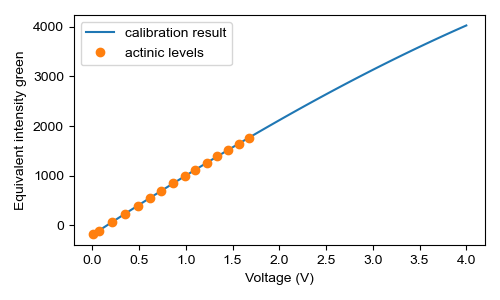

In [15]:
V = VoltageIntensityClass.VoltageIntensity(folder = "E:/Experimental_data/DREAM_microscope/2023-10-18_16_53_bode_diagram")

a480 = 82
a532=7.7

voltage_fit = np.linspace(0, 4, 100)
intensity_fit = V.get_intensity_voltage("blue", 1, voltage_fit)*1e6
intensity_green_fit = intensity_fit*a480/a532
intensity_green = V.get_intensity_voltage("blue", 1, Actinic_measured_volt)*1e6*a480/a532


fig, ax = plt.subplots(figsize = (5,3))
ax.plot(voltage_fit, intensity_green_fit, label = "calibration result")
ax.plot(Actinic_measured_volt, intensity_green, 'o', label = "actinic levels")
ax.legend()

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Equivalent intensity green")

fig.tight_layout()



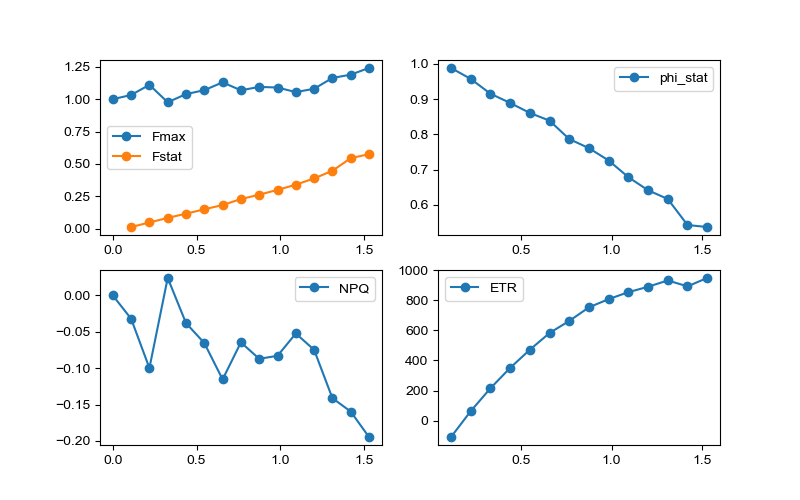

In [39]:
fig, ax = plt.subplots(2,2, figsize = (8,5))
ax[0,0].plot(Actinic_set_volt, params_df.F_max, 'o-', label = "Fmax")
ax[0,0].plot(Actinic_set_volt[1:], params_df.F_stat[1:], 'o-', label = "Fstat")
ax[0,1].plot(Actinic_set_volt[1:], params_df.phi_stat[1:], 'o-', label = "phi_stat")
ax[1,0].plot(Actinic_set_volt, params_df.NPQ, 'o-', label = "NPQ")
ax[1,1].plot(Actinic_set_volt[1:], params_df.ETR[1:], 'o-', label = "ETR")
ax = [ax.legend() for ax in ax.flatten()]